# Import Libraries

In [2]:
import pandas as pd

# Reading the Dataset

In [4]:
movies=pd.read_csv(r'C:\Users\HP\Downloads\archive\movie.csv')
movies.shape

(27278, 3)

In [5]:
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
tags=pd.read_csv(r'C:\Users\HP\Downloads\archive\tag.csv')
tags.shape

(465564, 4)

In [7]:
print(type(tags))
tags.head()

<class 'pandas.core.frame.DataFrame'>


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [8]:
ratings=pd.read_csv(r'C:\Users\HP\Downloads\archive\rating.csv')
ratings.shape

(20000263, 4)

In [9]:
print(type(ratings))
ratings.head()

<class 'pandas.core.frame.DataFrame'>


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [10]:
del ratings['timestamp']
del tags['timestamp']

# Data Structures

In [12]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [13]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [14]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [15]:
row_0['userId']

18

In [16]:
'rating' in row_0

False

In [17]:
row_0.name

0

In [18]:
row_0=row_0.rename('firstrow')
row_0.name

'firstrow'

# Data Frames

In [20]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [21]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [22]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [23]:
tags.iloc[[0,11,500]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


# Descriptive Statistics

In [25]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [26]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [27]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [28]:
ratings['rating'].mean()

3.5255285642993797

In [29]:
ratings.min()

userId     1.0
movieId    1.0
rating     0.5
dtype: float64

In [30]:
ratings['rating'].min()

0.5

In [31]:
ratings.max()

userId     138493.0
movieId    131262.0
rating          5.0
dtype: float64

In [32]:
ratings['rating'].max()

5.0

In [33]:
ratings.std()

userId     40038.626653
movieId    19789.477445
rating         1.051989
dtype: float64

In [34]:
ratings['rating'].std()

1.051988919275684

In [35]:
ratings.mode()

,userId,movieId,rating
0,118205,296,4.0


In [36]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [37]:
ratings.corr() # correlation 

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [38]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [39]:
filter2 = ratings['rating'] > 0
filter2.all()

True

# Data Cleaning

In [41]:
movies.shape

(27278, 3)

In [42]:
movies.isnull().any().any()

False

In [43]:
ratings.shape

(20000263, 3)

In [44]:
ratings.isnull().any().any()

False

In [45]:
tags.shape

(465564, 3)

In [46]:
tags.isnull().any().any()# consists null values

True

In [47]:
tags=tags.dropna() # dropping all the null values and rows

In [48]:
tags.isnull().any().any() # removed all the null values

False

In [49]:
tags.shape

(465548, 3)

# Data Visualization

In [51]:
import matplotlib.pyplot as plt

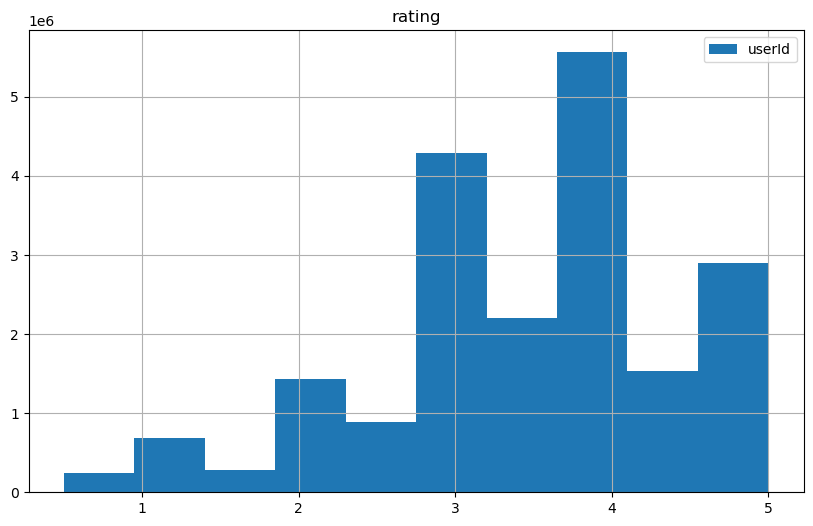

In [52]:
%matplotlib inline
ratings.hist(column='rating',figsize=(10,6))
plt.legend(ratings)
plt.show()

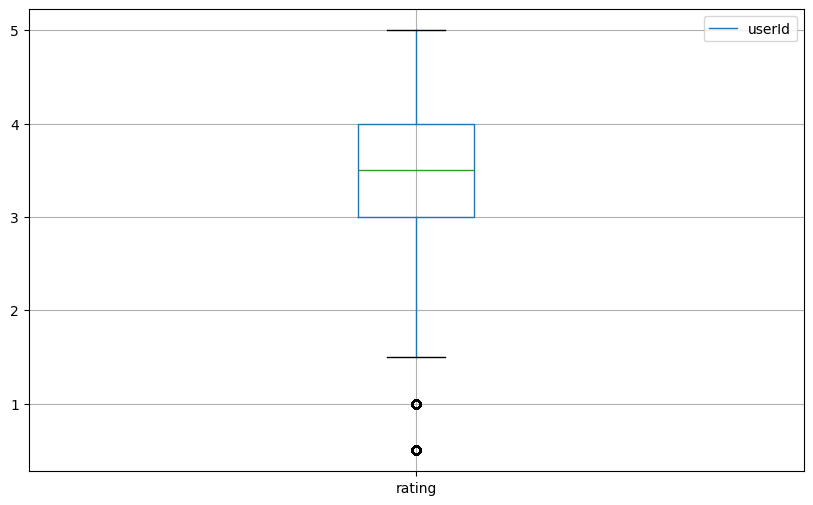

In [53]:
ratings.boxplot(column='rating', figsize=(10,6))
plt.legend(ratings)
plt.show()

# Column Slicing

In [55]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [56]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [57]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [58]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [59]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [60]:
ratings[['movieId','rating']].head()

,movieId,rating
0,2,3.5
1,29,3.5
2,32,3.5
3,47,3.5
4,50,3.5


In [61]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [62]:
tag_counts=tags['tag'].value_counts()
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

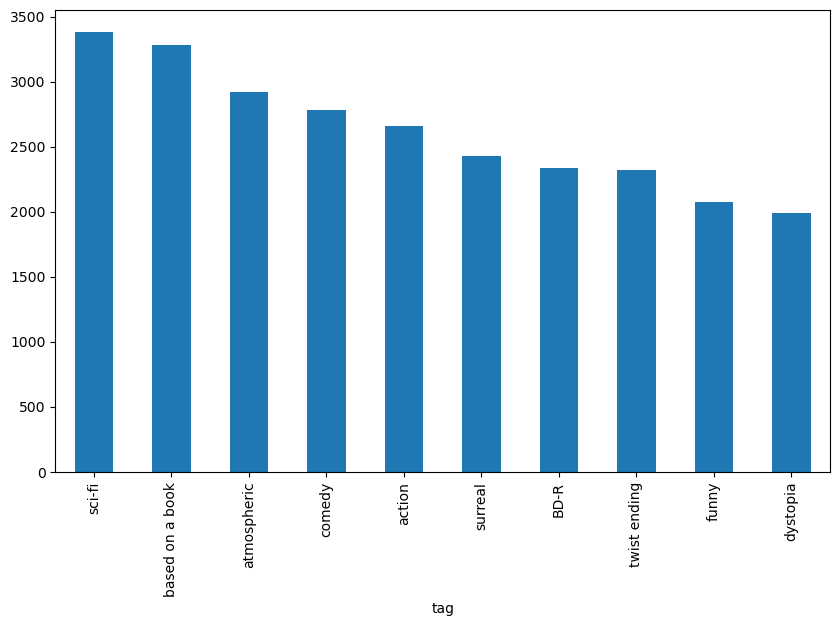

In [63]:
tag_counts[:10].plot(kind='bar',figsize=(10,6))
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3240\3370316172.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10').colors


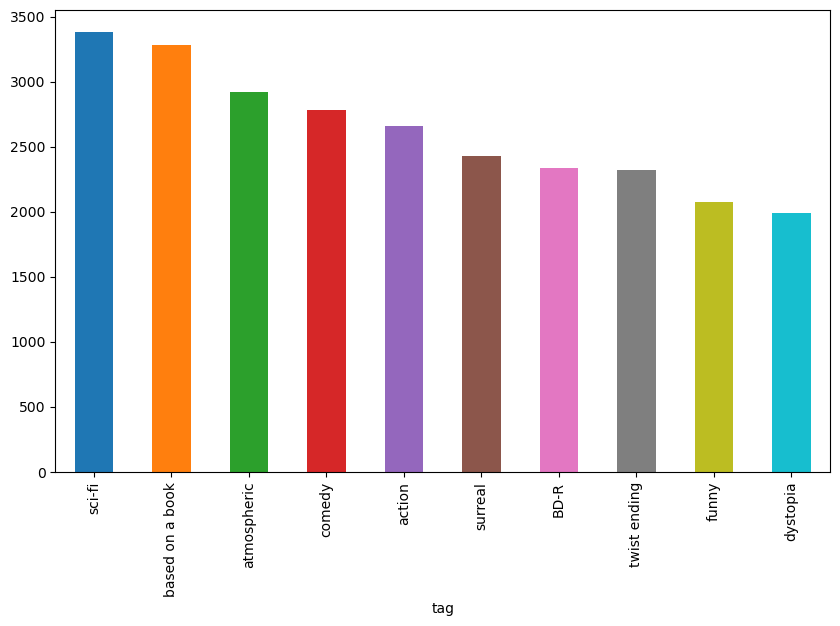

In [64]:
# Generate a list of distinct colors
colors = plt.cm.get_cmap('tab10').colors
colors = colors[:10]

# Plot the bar chart with custom colors
tag_counts[:10].plot(kind='bar', figsize=(10, 6), color=colors)
plt.show()

# Row Filtering

In [66]:
highly_related=ratings['rating']>=5.0
ratings[highly_related][30:50]

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [67]:
action=movies['genres'].str.contains('Action')
movies[action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [68]:
movies[action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


# Group By and Aggregate

In [70]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [71]:
average_rating=ratings[['movieId','rating']].groupby('movieId').count()
average_rating.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [72]:
average_rating=ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [73]:
average_rating=ratings[['movieId','rating']].groupby('movieId').count()
average_rating.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


# Merge Dataframes

In [75]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [76]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
a=movies.merge(tags, on='movieId', how='inner')
a.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [78]:
a=movies.merge(tags, on='movieId', how='outer') # it includes decimal values
a.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,TÃ©a Leoni does not star in this movie


In [158]:
avg_ratings = ratings.groupby('movieId',as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [160]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [162]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [164]:
is_Adventure = box_office['genres'].str.contains('Adventure')
box_office[is_Adventure][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [166]:
box_office[is_Adventure & is_highly_rated][-5:]

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [168]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [170]:
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [172]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


In [174]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.tail()

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\HP\AppData\Local\Temp\ipykernel_3240\2385283693.py:1: SyntaxWarning: invalid escape sequence '\('
  movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)


,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


# Timestamps

In [179]:
tags = pd.read_csv(r'C:\Users\HP\Downloads\archive\tag.csv', sep=',')
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

In [181]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


# Average Movie Ratings

In [190]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


### Completed